# Sentimental Analysis of Amazon Reviews

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import re

In [2]:
import json
import gzip

def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.dumps(eval(l))
      

f = open("output.strict", 'w')
for l in parse("reviews_Musical_Instruments_5.json.gz"):
  f.write(l + '\n')

In [3]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df1 = {}
  for d in parse(path):
    df1[i] = d
    i += 1
  return pd.DataFrame.from_dict(df1, orient='index')

df_musical = getDF('reviews_Musical_Instruments_5.json.gz')


df_musical.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df_musical.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
df_musical.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

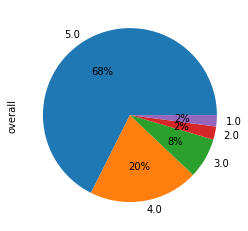

In [6]:
plt = df_musical.overall.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [7]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df3 = {}
  for d in parse(path):
    df3[i] = d
    i += 1
  return pd.DataFrame.from_dict(df3, orient='index')

df_auto = getDF('reviews_Automotive_5.json.gz')


df_auto.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car...,5.0,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but ...",4.0,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]",Can't comment much on these since they have no...,5.0,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]",I absolutley love Amazon!!! For the price of ...,5.0,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]",I purchased the 12' feet long cable set and th...,5.0,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"


In [8]:
df_auto.drop(df_auto[df_auto.overall == 5.0].index, inplace=True)
df_auto.drop(df_auto[df_auto.overall == 4.0].index, inplace=True)
df_auto.count()


reviewerID        2578
asin              2578
reviewerName      2546
helpful           2578
reviewText        2578
overall           2578
summary           2578
unixReviewTime    2578
reviewTime        2578
dtype: int64

# Removing the bias in dataset by adding more negative reviews

In [9]:
rating1df = df_auto.loc[df_auto["overall"] == 1.0]
rating2df = df_auto.loc[df_auto["overall"] == 2.0]
rtng1df = df_musical.loc[df_musical["overall"] == 1.0]
rtng2df = df_musical.loc[df_musical["overall"] == 2.0]

In [10]:
df = [df_musical,df_auto,rating1df,rating2df, rtng1df, rtng2df,rating1df,rating2df, rtng1df, rtng2df, rating1df,rating2df, rtng1df, rtng2df,rating1df,rating2df, rtng1df, rtng2df ]

combined_df = pd.concat(df)
combined_df.count()

reviewerID        19299
asin              19299
reviewerName      19172
helpful           19299
reviewText        19299
overall           19299
summary           19299
unixReviewTime    19299
reviewTime        19299
dtype: int64

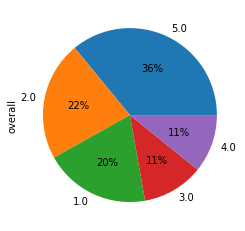

In [11]:
plt = combined_df.overall.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Data Pre-processing

In [12]:
# Dropping the unwanted columns
cleaned_df = combined_df[['reviewText', 'overall']]
cleaned_df.head()


,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [13]:
cleaned_df.count()

reviewText    19299
overall       19299
dtype: int64

In [14]:
#creating additional polar emotion column for ratings
def review_cat (row):
   if row['overall'] == 5.0 :
      return 'Positive'
   if row['overall'] == 4.0 :
      return 'Positive'
   if row['overall'] == 3.0:
      return 'Neutral'
   if row['overall']  == 2.0:
      return 'Negative'
   if row['overall'] == 1.0:
      return 'Negative'

cleaned_df['Review_Sentiment'] = cleaned_df.apply (lambda row: review_cat(row), axis=1)

#cleaned_df.head()

cleaned_df.count()

C:\Users\HimaniAkshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


reviewText          19299
overall             19299
Review_Sentiment    19299
dtype: int64

In [15]:
# Datatype of each column
cleaned_df.dtypes

reviewText           object
overall             float64
Review_Sentiment     object
dtype: object

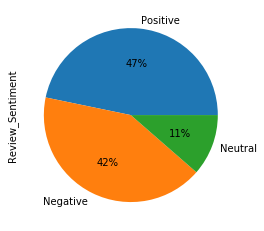

In [16]:
plt = cleaned_df.Review_Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [17]:
# Step 0: Reformat data
data = cleaned_df.values
X = data[:, 0]
y = data[:, 2]

print(X)
print(y)

["Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"
 "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]"
 'The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volu

In [18]:
#from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y)
#encoded_y = label_encoder.transform(y)
#print (encoded_y)
#print(encoded_y.shape)

In [19]:
#for label, original_class in zip(encoded_y, y):
 #   print('Original Class: ' + str(original_class))
  #  print('Encoded Label: ' + str(label))
  #  print('-' * 12)

In [20]:
#Creating an extra column to convert ratings to binary 
#1,2 ratings - 0 and 4,5 ratings - 1, removed rating 3 as it is neutral

#from keras.utils import to_categorical

# Step 2: One-hot encoding
#one_hot_y = to_categorical(encoded_y)
#one_hot_y

In [21]:
#one_hot_y.shape

In [22]:
X.shape

(19299,)

In [23]:

def process_text (anArray):

    processed_features = []

    for sentence in range(0, len(anArray)):
    # Remove all the special characters
        processed_feature = re.sub(r'\W', ' ', str(anArray[sentence]))

    # remove all single characters
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Converting to Lowercase
        processed_feature = processed_feature.lower()

        processed_features.append(processed_feature)
    
    return processed_features

In [24]:
ret_processed_features = process_text(X)

In [25]:
features = np.array(ret_processed_features)

print(features.shape)


(19299,)


# Train - Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.20, random_state=42)

In [27]:
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [28]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=45000, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
vectorized_features_trained = vectorizer.fit_transform(X_train)

vectorized_features_trained.shape


(15439, 22815)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
reviewTF = TfidfTransformer()


In [30]:
review_train_tfidf = reviewTF.fit_transform(vectorized_features_trained)

In [31]:
review_train_tfidf.shape

(15439, 22815)

In [32]:
vectorized_features_tested = vectorizer.transform(X_test)
review_test_tfidf = reviewTF.transform(vectorized_features_tested)


In [33]:
review_test_tfidf.shape

(3860, 22815)

# Analysis using Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(review_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
# Saving the model
import joblib
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [36]:
predictions = rf.predict(review_test_tfidf)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
cm

0.883937823834197
              precision    recall  f1-score   support

    Negative       0.89      1.00      0.94      1604
     Neutral       0.80      0.01      0.02       433
    Positive       0.88      0.99      0.93      1823

    accuracy                           0.88      3860
   macro avg       0.86      0.67      0.63      3860
weighted avg       0.87      0.88      0.83      3860



array([[1604,    0,    0],
       [ 179,    4,  250],
       [  18,    1, 1804]], dtype=int64)

In [38]:
# Model prediction on new data
new_data = ["Waiting for him. Hopefully he gets on facebook soon. Something is wrong though, some people can’t write on my wall. Hope it’s fixed soon"]
cleaned_data = process_text(new_data)

In [39]:
reviews_new = vectorizer.transform(new_data)         # turn text into count vector
reviews_new_tfidf = reviewTF.transform(reviews_new)  # turn into tfidf vector

In [40]:
#RFclassifier prediction
rfpred = rf.predict(reviews_new_tfidf)

In [41]:
# print out results
for review, category in zip(new_data, rfpred):
    print('%r => %s' % (review, category))

'Waiting for him. Hopefully he gets on facebook soon. Something is wrong though, some people can’t write on my wall. Hope it’s fixed soon' => Positive


# Analysis using SVM

In [42]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
svm_model.fit(review_train_tfidf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
# Saving the model
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
svm_predictions = svm_model.predict(review_test_tfidf)

In [ ]:
print(classification_report(y_test,svm_predictions))
print(accuracy_score(y_test, svm_predictions))

In [ ]:
# Model prediction on new data
new_data = ["Waiting for him. Hopefully he gets on facebook soon. Something is wrong though, some people can’t write on my wall. Hope it’s fixed soon"]
clean_new_data = process_text(new_data)

In [ ]:
reviews_new = vectorizer.transform(clean_new_data)         # turn text into count vector
reviews_new_tfidf = reviewTF.transform(reviews_new)  # turn into tfidf vector
print(reviews_new_tfidf)

In [ ]:
#SVMclassifier prediction
pred = svm_model.predict(reviews_new_tfidf)
print(pred)

In [ ]:
# print out results
for review, category in zip(new_data, pred):
    print('%r => %s' % (review, category))